# Sismos en Mexico.
- Sismos, temblores y terremotos son términos usuales para referirse a los movimientos de la corteza terrestre, sin embargo, técnicamente hablando, el nombre de sismo es más utilizado (terremoto se refiere a sismos de grandes dimensiones). Los sismos se originan en el interior de la tierra y se propaga por ella en todas direcciones en forma de ondas.

- Estos a su vez son de corta duración e intensidad variable y son producidos a consecuencia de la liberación repentina de energía. Paradójicamente, poseen un aspecto positivo que es el de proporcionarnos información sobre el interior de nuestro planeta. Actualmente, gracias a la técnica conocida como tomografía sismológica o sísmica, se conoce con gran detalle el interior de nuestro planeta.

### Objetivo.

- Es muy importante estar notificado sobre los movimientos sismicos en nuestro pais, ya que existen en Mexico muchisimas construcciones que no estan preparadas o diseñadas con fines de resistencia para sismos, y como se han presentado en los ultimos años es importante recalcar sus causas principales y asi mismo su intensidad y afectacion.

- Establecer por medio de Montecarlo una prediccion aleatoria para corroborar en relacion a los datos historicos, nuestra prediccion a 10 años.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
file_name = 'Jalisco.csv'
data = pd.read_csv(file_name, index_col=0)
data

,Magnitud
Fecha,
01/01/2008,4.2
01/01/2008,4.5
01/01/2008,3.9
01/01/2008,3.9
01/01/2008,3.6
01/01/2008,3.4
01/01/2008,3.6
01/02/2008,3.7
01/02/2008,4.2


# Gráfica por magnitudes de diez años

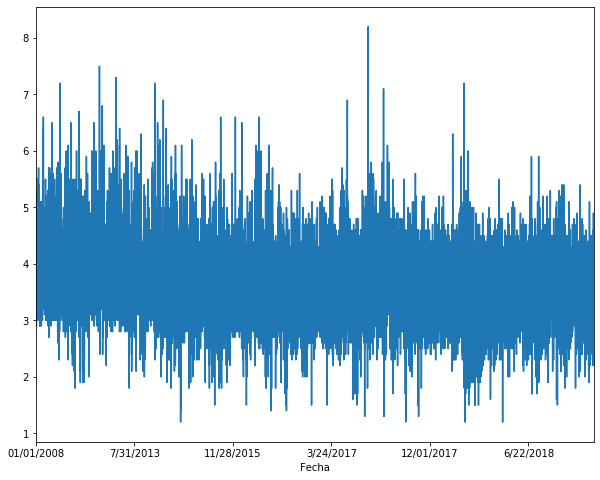

In [3]:
data.plot(figsize=(10,8),legend=False);

# Gráfica por magnitudes de 1 año

In [4]:
file_name = 'JALISCO 2018.csv'
data8 = pd.read_csv(file_name, index_col=0)
data8

,3.6
01/01/2018,
01/01/2018,3.9
01/01/2018,3.5
01/01/2018,3.1
01/01/2018,3.7
01/01/2018,3.6
01/01/2018,4.0
01/01/2018,3.7
01/01/2018,4.2
01/01/2018,3.8



# Gráfica por magnitudes de 1 año

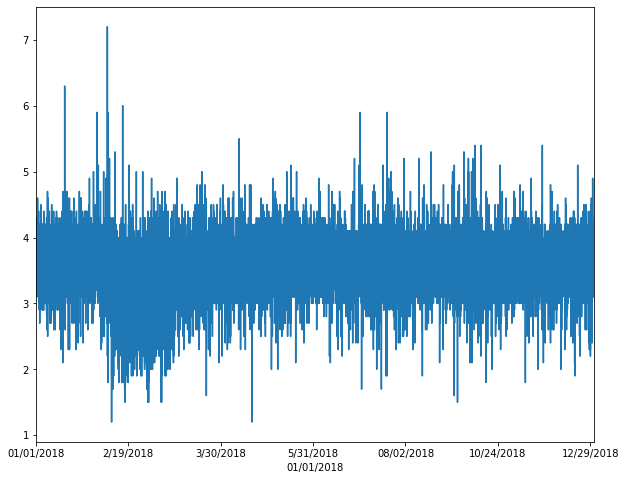

In [5]:
data8.plot(figsize=(10,8),legend=False);

## Media y desviación estándar

In [6]:
mu = data8.iloc[:,0].mean()
sigma = data8.iloc[:,0].std()
mu,sigma

(3.5466779279279352, 0.38386639580693044)

In [7]:
def sis_sim(mu,sigma,ndays,nscen,start_date):
    dates = pd.date_range(start = start_date,periods=ndays)
    rend_sim = sigma*np.random.randn(ndays,nscen) + mu
    return pd.DataFrame(index = dates, data = rend_sim)

# Simulamos 100 escenarios para todo el 2019

In [8]:
rend_sim = sis_sim(mu,sigma,365,100,"2019-01-01")
rend_sim

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2019-01-01,4.045124,3.879863,3.237990,3.034793,4.338469,3.261491,3.302425,3.693953,3.542001,3.861826,...,3.451981,4.008659,3.837938,3.116096,3.924361,2.847453,3.530069,3.027244,3.291844,3.983391
2019-01-02,4.279689,2.882725,3.648650,3.033642,2.529771,3.046921,3.498830,3.219194,3.119240,3.904443,...,3.000840,2.979456,4.119244,2.984774,4.431138,3.752933,3.343134,3.679865,3.374966,3.390215
2019-01-03,3.323827,3.009588,3.469441,3.602674,3.141644,4.005954,3.915103,3.228676,3.379428,3.609767,...,4.197787,3.179788,3.555947,3.304795,3.943825,3.833565,3.103952,3.766457,2.580364,3.697537
2019-01-04,3.617217,2.972240,3.381904,3.349433,3.708738,3.352182,3.216910,3.458581,4.087835,3.532810,...,4.340804,3.944228,2.719047,3.799714,3.432043,3.337995,4.107495,3.376129,3.449781,3.236715
2019-01-05,4.019414,3.605115,3.597792,4.309423,3.678931,3.620512,3.391264,3.578242,4.057357,4.225188,...,2.904414,3.346806,3.213680,3.842733,3.078769,3.434321,3.197073,2.932965,3.814616,3.480450
2019-01-06,3.590503,3.965400,3.579596,3.825468,3.905467,3.505395,3.367205,2.731441,4.055561,3.369318,...,3.252812,3.532975,3.386431,3.173810,2.524645,3.942841,3.258150,3.100982,3.790764,3.171395
2019-01-07,3.500815,3.645870,3.697827,3.468197,3.760875,3.629986,3.856864,3.608866,3.578894,3.916911,...,3.357435,3.762347,4.300678,4.093367,3.465196,4.043318,3.732195,3.333764,3.456210,3.858572
2019-01-08,3.801057,3.027102,3.172671,3.464347,3.433255,3.422842,3.079759,3.513181,2.676675,3.259811,...,3.383626,3.973689,3.257629,3.890162,3.948164,3.396613,3.463383,3.518909,3.577310,3.223093
2019-01-09,3.696511,3.915131,3.880173,3.488052,4.343479,3.351475,3.566619,4.107007,3.579058,3.656887,...,3.416277,3.760253,3.684229,3.275941,3.302066,3.275082,2.480042,3.668556,3.709386,3.643641
2019-01-10,3.577136,4.002796,2.990540,3.396675,3.868906,3.757962,3.455959,2.712322,3.886515,2.770099,...,4.271745,3.592704,3.413421,3.215868,3.277614,2.910424,3.433019,3.493522,3.715644,4.135367


## Gráfica

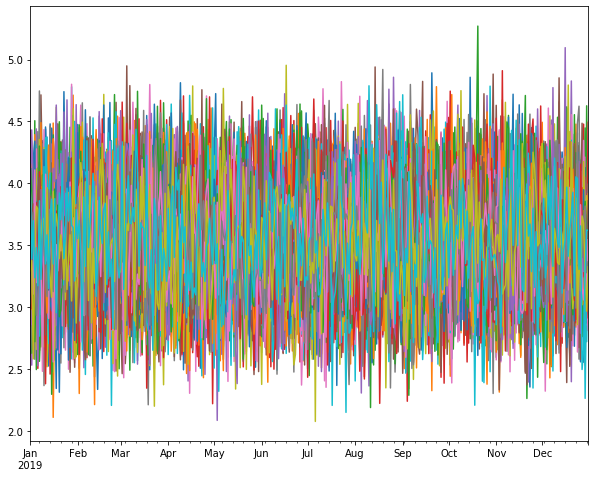

In [9]:
rend_sim.plot(figsize=(10,8),legend=False);

In [10]:
rend_sim1 = sis_sim(mu,sigma,365,3,"2019-01-01")
rend_sim1

,0,1,2
2019-01-01,3.854667,3.416425,2.998113
2019-01-02,3.776637,3.322728,3.297270
2019-01-03,3.472063,3.549609,3.482877
2019-01-04,3.308748,2.400649,2.984844
2019-01-05,3.266396,3.709194,3.470901
2019-01-06,4.009106,3.290858,3.025129
2019-01-07,3.023517,4.026622,3.287528
2019-01-08,3.657130,3.722957,4.087426
2019-01-09,3.681009,3.609807,2.837495
2019-01-10,3.358694,4.315855,3.328772


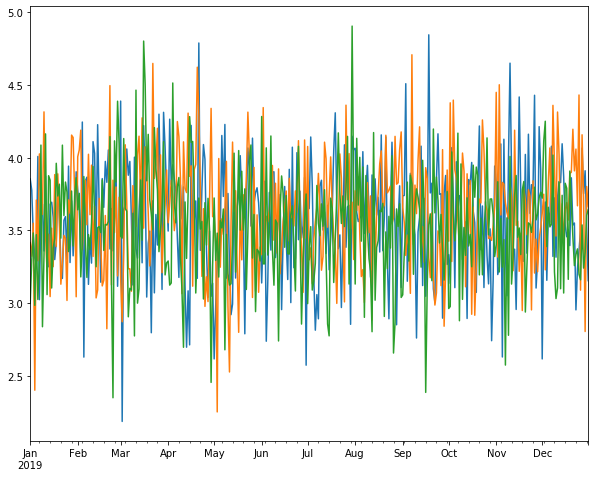

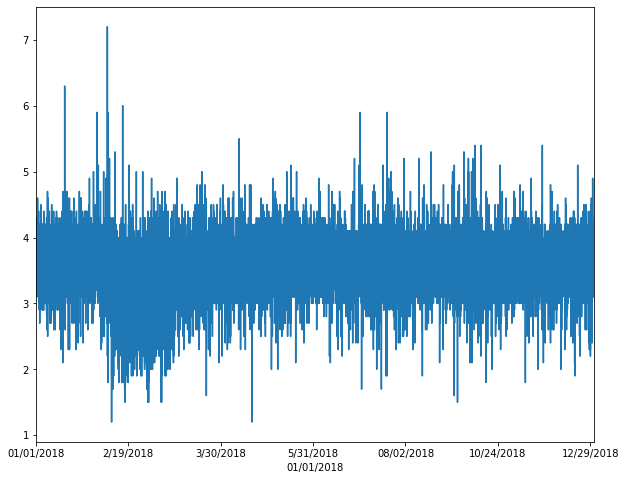

In [11]:
rend_sim1.plot(figsize=(10,8),legend=False),data8.plot(figsize=(10,8),legend=False);

## Conclusión.
Es importante recalcar que los sismos dependen de muchos factores pues se debe de tomar en cuenta no solo el movimiento de las placas tectónicas, si que en su varianza de magnitud entran rasgos como población por km^2 y a su vez vibraciones externas como la es de maquinaria, fábricas, automóviles, etc.

Pero con esto logramos definir una estimación en relación a los datos históricos, y con ellos poder tomar precauciones, es por ello que dia a dia se generar nuevos metodos de construccion para combatir con los posibles sismos o terremotos, en un futuro y evitar la pérdida de vidas humanas y daños terceros.

Se alcanza a notar que en la epoca donde mas sismos han ocurrido conforme a su registro histórico logramos observar que son en la segundo sexenio del año, esto reflejado en las tablas.